In [ ]:
# Mayank Singla
# 111901030

In [1]:
# importing numpy library as np
import numpy as np

In [ ]:
# Q1 - (i)
low = -10 # Lower bound
high = 10  # Upper bound
count = 100 # Total random numbers to generate
print(np.random.randint(low, high+1, count))    # Generated random numbers between [l, h]

[ -2   3  -4  -1  10  -2  -8  -8   3   1   5   7   8   5   6   2  -4  -3
  10  -7   2  10  -8   1  -9 -10  10   4  -2   5  -5   3  -2   4  -4  -9
   3   8   4   2   2  -5  -9   4   7  -8   3  -6  -5  -6 -10   5  -1  -3
  -2   1  -8   4  -3   0   0   5   2  -5  -3  -1  -7  -9   8  -6  10  -8
   2   7   9  -1  -1  -8   2  -1   3   0  -9   3  10   4   6   3  -5  -6
  -8  -1  -8   4  -5  -3  -3  -1  -6  -3]


In [ ]:
# Q1 - (ii)
print(np.random.rand())    # Generate random numbers between 0 and 1
# [LEGACY] Note: actually generated b/w [0, 1)

0.1772534853851231


In [5]:
# Q2 - (a)
def generatePoints(n):  # Function to generate n random points in 2D in [-1, 1) X [-1, 1)
    points = np.random.uniform(-1, 1, (n, 2));
    return points

pointsCount = 100
points1 = generatePoints(pointsCount)
print(points1)

[[ 0.50923532 -0.41736798]
 [ 0.08811318 -0.19882914]
 [ 0.36497658  0.90728765]
 [ 0.81394313  0.22450884]
 [-0.91883273  0.9735626 ]
 [-0.59374702  0.85060158]
 [-0.55823255 -0.05000014]
 [-0.97679569  0.41131353]
 [-0.50472631 -0.11781987]
 [ 0.74509891  0.93117114]
 [-0.59303218  0.85493345]
 [-0.47131726  0.73473525]
 [ 0.96897816  0.70034906]
 [-0.0827888   0.43807418]
 [ 0.27344387 -0.77061781]
 [ 0.37930311  0.50671518]
 [ 0.83267675 -0.87265931]
 [-0.82176359 -0.92187017]
 [ 0.59971138  0.16347941]
 [-0.32475116  0.59140554]
 [-0.19577966  0.36038705]
 [-0.4895095  -0.95268398]
 [-0.86641334 -0.61571373]
 [-0.59053509  0.00436498]
 [ 0.11223508 -0.58013736]
 [-0.39289662  0.10517059]
 [ 0.15814854  0.60414212]
 [-0.46677431 -0.04858302]
 [-0.13637048 -0.03908092]
 [-0.48468872  0.56221018]
 [-0.2885391  -0.92074705]
 [ 0.89950274  0.25918693]
 [-0.03257682  0.50992197]
 [-0.7130859   0.64988115]
 [ 0.49861617 -0.67897299]
 [ 0.57034387  0.22451833]
 [-0.05160184 -0.32370745]
 

In [6]:
# Q2 - (b)

# New point
xNew = 0.5
yNew = 0.5

# Function that take two points and returns the Euclidean Distance between those two points
def findDist(point1, point2):
    # point1 and point2 are 2D points (x, y) in form of array [x, y]
    return np.linalg.norm(point1-point2)

# Comparator function to sort the array on the basis of distance
# Each array element is of form [index, distance]
def compare(arr):
    return arr[1]

# Function to find k nearest points in the given points from a given newPoint
def findKNearestPoints(points, newPoint, k):
    numPoints = len(points) # number of given points

    if numPoints <= k:    # if number of points are less than or equal to k, return them
        return points

    distanceArr = []    # Array to store the [index, distance] where index is index of point and distance = distance of point from new point
    for i in range(numPoints):
        distanceArr.append([i, findDist(points[i], newPoint)])
    distanceArr.sort(key=compare)   # Sorting the distanceArr on the basis of distance

    kNearestPoints = [] # Array to store only first k points from the distanceArr
    for i in range(k):
        index = distanceArr[i][0]
        kNearestPoints.append(points[index])
        
    return np.array(kNearestPoints)

# For k = 5, 10, 15 nearest points
kNearestPoints_5 = findKNearestPoints(points1, np.array([xNew, yNew]), 5)
kNearestPoints_10 = findKNearestPoints(points1, np.array([xNew, yNew]), 10)
kNearestPoints_15 = findKNearestPoints(points1, np.array([xNew, yNew]), 15)

In [7]:
# Q2 - (c)

# Function to find the angle b/w two points b/w [0, 360]
def findAngle(point1, point2):
    angle1 = np.rad2deg(np.arctan2(point1[1], point1[0]))   # angle1 b/w [-180, 180]
    angle2 = np.rad2deg(np.arctan2(point2[1], point2[0]))   # angle2 b/w [-180, 180]
    return ((angle1-angle2)%(360))    # diff of angle b/w [-360, 360], therefore taking %360 to get angle b/w [0, 360]

# Function to find k points that make a positive angle with the new point
def findKPositiveAnglePoints(points, newPoint, k):
    numPoints = len(points) # number of given points
    angleArr = []   # Array to store points that make positive angle with the new point
    count = 0   # To keep track of how many points we have found
    for point in points:
        angle = findAngle(point, newPoint)
        if(angle<=90 or angle>=270):    # if angle is <=90 or >=270, it will make +90 or -90 angle with the point, so include it
            angleArr.append(point)
            count += 1
            if(count>=k):   # if we have found k points, break the loop
                break
    return np.array(angleArr)

# For k = 5, 10, 15 positive angle points
kPositiveAnglePoints_5 = findKPositiveAnglePoints(points1, np.array([xNew, yNew]), 5)
kPositiveAnglePoints_10 = findKPositiveAnglePoints(points1, np.array([xNew, yNew]), 10)
kPositiveAnglePoints_15 = findKPositiveAnglePoints(points1, np.array([xNew, yNew]), 15)

In [8]:
import matplotlib.pyplot as plt

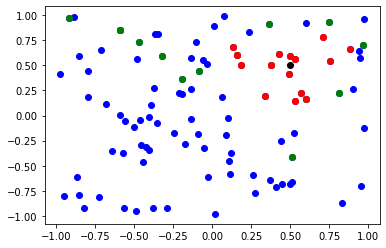

In [9]:
# Q3 - (a)
plt.scatter(points1[:, 0], points1[:, 1], c="b", label="Random Points")  # Plotting random points
plt.scatter(xNew, yNew, c="k", label="New Point")   # Plotting the New Point
plt.scatter(kPositiveAnglePoints_15[:, 0], kPositiveAnglePoints_15[:, 1], c="g", label="K Positive Angle Points")   # Plotting k Positive angle points
# plt.scatter(kPositiveAnglePoints_15[:, 0], kPositiveAnglePoints_15[:, 1], c="r", label="K Positive Angle Points")   # Plotting k Positive angle points
plt.scatter(kNearestPoints_15[:, 0], kNearestPoints_15[:, 1], c="r", label="K Nearest Points")  # Plotting k Nearest points
# plt.legend()

(array([ 9.,  7., 16.,  6., 11., 11.,  7., 13.,  9., 11.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <a list of 10 Patch objects>)

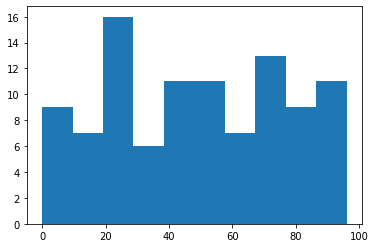

In [ ]:
# Q3 - (b)
n = 100
points2 = np.random.randint(100, size=n)   # 100 random Integers
plt.hist(points2)

# [LEGACY] Just for reference, other styling we can perform
##
# Plotting Histogram of random points with width of bar = 0.95*bin width and with label shown as legend
##
# plt.hist(points2, rwidth = 0.95, label="Random Itegers")
# plt.legend()
#

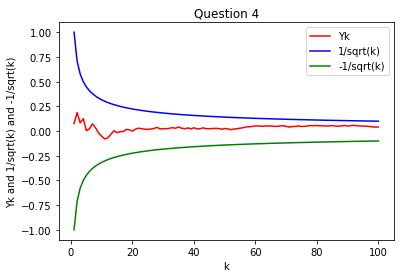

In [ ]:
# Q4
n = 100
points3 = np.random.uniform(-0.5, 0.5, n)    # Generating random numbers b/w [-0.5, 0.5]

arrayK = np.zeros(n)        # Array to store the numbers from 1 to n
runningMean = np.zeros(n)   # Array to store the running mean of numbers
f1 = np.zeros(n)    # Array to store the values of 1/sqrt(k) from k = 1 to n
f2 = np.zeros(n)    # Array to store the values of -1/sqrt(k) from k = 1 to n
sum = 0             # The running sum of random numbers

for i in range(n):  # Evaluating above values
    sum += points3[i]
    arrayK[i] = i+1
    runningMean[i] = sum/(i+1)
    f1[i] = 1/np.math.sqrt(i+1)
    f2[i] = -1/np.math.sqrt(i+1)

#[LEGACY] Just for reference, other method to achieve the same result
## 
#np.vectorize makes a function that accepts single value as arg, to take array as arg and take each array element and do computation on each single value and return the computed array
##
# f1 = 1/np.vectorize(np.math.sqrt)(arrayK)
# f2 = -1/np.vectorize(np.math.sqrt)(arrayK)
#

# Plotting
plt.plot(arrayK, runningMean, "r", label="Yk")  # Plotting Running mean vs k values
plt.plot(arrayK, f1, "b", label="1/sqrt(k)")    # Plotting 1/sqrt(k) vs k values
plt.plot(arrayK, f2, "g", label="-1/sqrt(k)")   # Plotting -1/sqrt(k) vs k values
plt.title("Question 4") # Setting title of plot
plt.xlabel("k")         # Setting x-label fo plot
plt.ylabel("Yk and 1/sqrt(k) and -1/sqrt(k)")   # Setting y-label of plot
plt.legend()    # Showing legend in the plot